# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

In [29]:
#import dataset
financial = pd.read_csv("data_raw/financial.csv")
#parse time columns --> sring column to datetime format
financial["date"] = pd.to_datetime(financial["date_str"], format = "%Y-%m-%d") 

In [30]:
# making strings from datetime format using wildcards
financial["month_str"] = financial["date"].dt.strftime("%m")
financial["week_str"]  = financial["date"].dt.strftime("%W")
message_monthname = financial["date"].dt.strftime("This is the month of %B")
message_monthday = financial["date"].dt.strftime("The day of the week is %A")
#combining wild cards and characters
#converts to standard datetime format after putting inputs
date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
date2 = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")

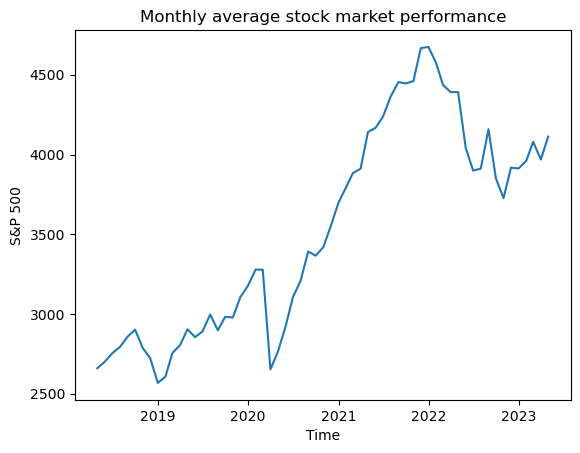

In [15]:
#use a grouper to aggregate on your chosen level (year, month, week, day)
month_config = pd.Grouper(key='date', freq='m')
monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())
plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Monthly average stock market performance")
plt.show()

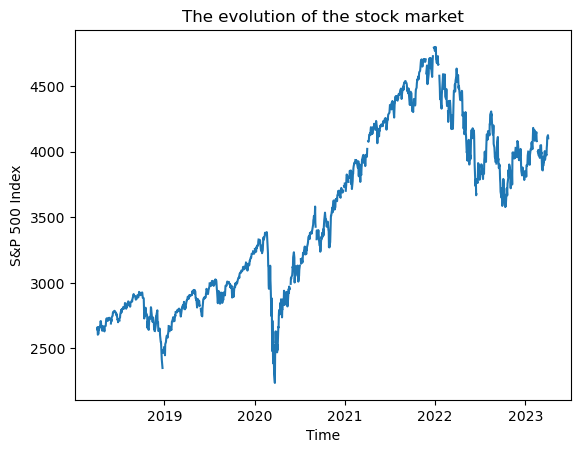

In [16]:
plt.plot("date", "sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500 Index")
plt.title("The evolution of the stock market")
plt.show()

In [17]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial         = financial.sort_values("date",ascending = True)


<font size = "5">

(b) Line plots from multiple columns with a legend

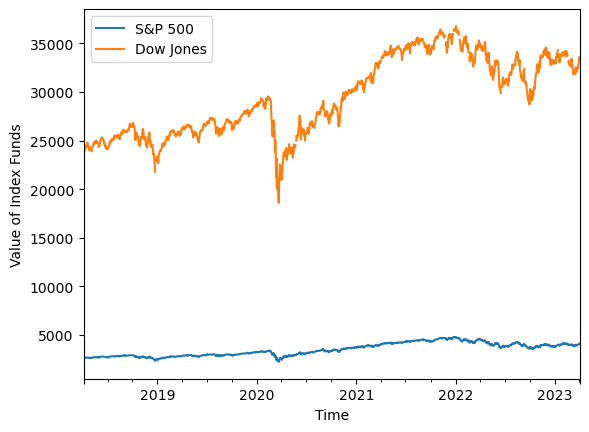

In [18]:
(financial[["date","sp500","djia"]]
    .set_index("date").plot())
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])
plt.show()


<font size = "5">

(c) Compute growth rates for a time series

In [22]:
financial["diff_djia"] = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = (financial["diff_djia"]/financial["lag_djia"])*100


<font size = "5">

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

In [23]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_djia"] > 5

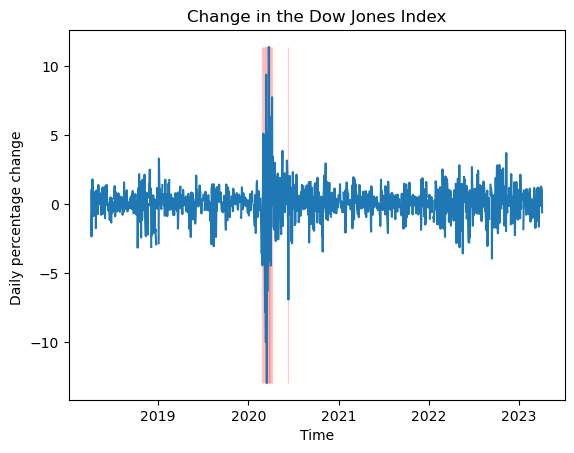

In [11]:
financial["bool_djia"]  = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

plt.plot("date", "growth_djia",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the Dow Jones Index")

vec_y = financial["growth_djia"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_djia"], #only shade observations that are true
                 alpha = 0.2,color = "red")
plt.show()


<font size = "5">

(e) Compute aggregate dataset by time period

In [24]:
subset_before  = financial.query('date >= "2019-01-01" ')
subset_after   = financial.query('date <= "2020-01-01" ')
subset_between = financial.query('date.between("2020-03-01","2020-05-01")')


<font size = "5">

(f) Convert a dataset to long format


In [25]:
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date', #variable to match on
                         value_vars=['sp500','djia'])

financial_long

,date,portfolio_type,portfolio_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15
